In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
import pandas as pd
import numpy as np

# for Box-Cox Transformation
from scipy import stats

# for min_max scaling
from mlxtend.preprocessing import minmax_scaling

# plotting modules
import seaborn as sns
import matplotlib.pyplot as plt

##### Scaling of Data:
In scaling, you are changing the range of your data
This means that we're transforming the data so that it fits within a specific scale, like 0-100 or 0-1. We want to scale data when you're using methods based on measures of how far apart data points.
*i.e.:* If we are looking at the prices of some products in both Rupees and US dollar. One US dollar is worth about 73 Rupees, but if we do not scale the prices methods like SVM or KNN will consider a difference in price of 1 INR. as important as a difference of 1 US dollar! This clearly doesn't fir with our intuitions of the world. With currency, we can convert between currencies. But what about if we're looking at something like hight and weight? It is not entirely clear how many pounds should equal one inch (or how many KG should equal to one KM).
By scaling the variables, you can help compare different variables on equal footing.

In [3]:
# ----- Generating 1000 data points randomly drawn from an exponential distribution
originalData = np.random.exponential(size = 1000)

# ----- min-mix scale the data between 0 and 1
scaledData = minmax_scaling(originalData, columns = [0])

In [4]:
originalData[:10]

array([1.24706917, 2.68579075, 3.61222077, 0.00614342, 0.30906789,
       0.35262666, 0.14682464, 0.15089852, 1.09873733, 3.63187664])

In [5]:
scaledData[:10]

array([[0.19145847],
       [0.41265911],
       [0.55509592],
       [0.00066856],
       [0.0472426 ],
       [0.05393968],
       [0.02229802],
       [0.02292437],
       [0.16865274],
       [0.55811797]])

C:\Users\dashc\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\dashc\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Scaled Data')

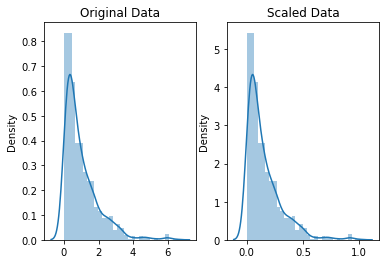

In [6]:
# ----- Plotting both data togehter to compare
fig, ax = plt.subplots(1, 2)
sns.distplot(originalData, ax = ax[0])
ax[0].set_title("Original Data")
sns.distplot(scaledData, ax=ax[1])
ax[1].set_title("Scaled Data")

C:\Users\dashc\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Scaled data')

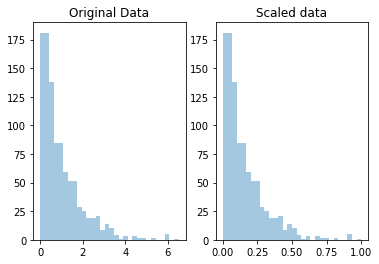

In [7]:
fig, ax=plt.subplots(1,2)
sns.distplot(originalData, kde = 0, ax=ax[0])
ax[0].set_title("Original Data")
sns.distplot(scaledData, kde = 0, ax=ax[1])
ax[1].set_title("Scaled data")

*Notice that the shape of the data doesn't change, but that instead of ranging from 0 to 8ish, it now ranges from 0 to 1.*

##### Normalization of Data:
Scaling just changes the range of the data. Normalization is more radical transformation. The point of normalization is to change our observations so that they can be described as normal distribution.
```
Normal Distribution: also known as the 'bell curve', this is a specific statistical distribution where a roughly equal observations fall above the mean, the mean and the median are the same, and there are more observations closer to the mean. The normal distribution is also known as the Gaussian distribution.
```

In general, you'll only want to normalize your data if you're going to be using a machine learning or statistics technique that assumes your data is normally distributed. Some examples of these include t-tests, ANOVAs, linear regression, linear discriminant analysis (LDA) and Gaussian naive Bayes. (Pro tip: any method with "Gaussian" in the name probably assumes normality.)

The method were using to normalize here is called the Box-Cox Transformation. Let's take a quick peek at what normalizing some data looks like:

In [23]:
# ----- Normalize the exponential data with box-cox
normalizedData = stats.boxcox(originalData)

C:\Users\dashc\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\dashc\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Normalized data')

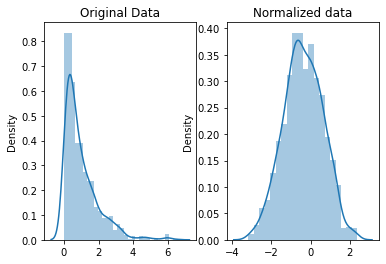

In [24]:
# ----- plotting both together to compare
fig, ax=plt.subplots(1,2)
sns.distplot(originalData, ax=ax[0])
ax[0].set_title("Original Data")
sns.distplot(normalizedData[0], ax=ax[1])
ax[1].set_title("Normalized data")

*Notice that the shape of our data has changed. Before normalizing it was almost L-shaped. But after normalizing it looks more like the outline of a bell (hence "bell curve").*

##### Applying Scaling method on the Dataset

In [25]:
data = pd.read_csv(r'D:\DashClicks Personal\pvProjects22042021.csv')
# set seed for reproducibility
np.random.seed(0)

In [26]:
data.sample(5)

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
338862,796196901,10G Christmas Tree,Art,Art,USD,2010-12-26,10526.0,2010-12-08 08:44:04,0.0,failed,0,US,0.0,0.0,10526.0
277871,483825010,Gliff,Gaming Hardware,Games,USD,2016-03-28,10000.0,2016-01-28 04:56:18,51.0,failed,5,US,51.0,51.0,10000.0
47000,123916947,STUFFED Food Truck,Food Trucks,Food,USD,2015-01-06,60000.0,2014-11-07 02:24:36,25.0,failed,1,US,25.0,25.0,60000.0
111338,1565733636,NeoExodus Adventure: Origin of Man for Pathfin...,Tabletop Games,Games,USD,2012-05-01,500.0,2012-03-15 01:16:10,585.0,successful,17,US,585.0,585.0,500.0
53743,1273544891,NAPOLEON IN NEW YORK! an original TV Series,Comedy,Film & Video,USD,2016-07-26,25000.0,2016-05-27 00:07:25,25.0,failed,1,US,25.0,25.0,25000.0


C:\Users\dashc\anaconda3\lib\site-packages\mlxtend\preprocessing\scaling.py:40: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ary_new = ary_new[:, np.newaxis]
C:\Users\dashc\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\dashc\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWa

Text(0.5, 1.0, 'Scaled data')

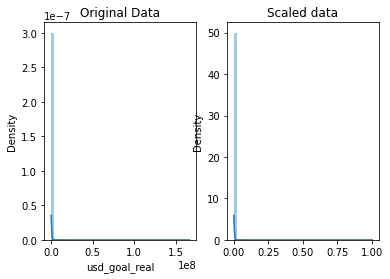

In [28]:
# select the usd_goal_real column
usdGoal = data.usd_goal_real

# scale the goals from 0 to 1
scaled_data = minmax_scaling(usdGoal, columns = [0])

# plot the original & scaled data together to compare
fig, ax=plt.subplots(1,2)
sns.distplot(data.usd_goal_real, ax=ax[0])
ax[0].set_title("Original Data")
sns.distplot(scaled_data, ax=ax[1])
ax[1].set_title("Scaled data")

*You can see that scaling changed the scales of the plots dramatically (but not the shape of the data: it looks like most campaigns have small goals but a few have very large ones)*

##### Applying Normalization method on the Dataset

In [29]:
# ----- Get the index of all positive pledges (Box-Cox only takes postive values)
index_of_positive_pledges = data.usd_pledged_real > 0

positive_pledges = data['usd_pledged_real'][index_of_positive_pledges]

C:\Users\dashc\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\dashc\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Normalized data')

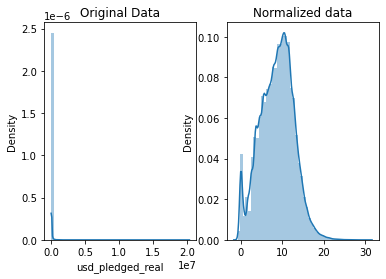

In [31]:
# normalize the pledges (w/ Box-Cox)
normalized_pledges = stats.boxcox(positive_pledges)[0]

# plot both together to compare
fig, ax=plt.subplots(1,2)
sns.distplot(positive_pledges, ax=ax[0])
ax[0].set_title("Original Data")
sns.distplot(normalized_pledges, ax=ax[1])
ax[1].set_title("Normalized data")

*You can see that normalization changed the shape of the plots dramatically*